In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
d=pd.read_excel(r"C:\Users\RAJAPU SURYA PRAKASH\TITANIC_DATA(1).xlsx",index_col=0)
d.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [4]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [5]:
d.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [6]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [7]:
d.duplicated().sum()

0

In [8]:
d.shape

(891, 9)

In [9]:
d.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [10]:
continous=['PassengerId','Age','Fare']
discrete_count=['Survived','Pclass','Sex','SibSp','Parch','Embarked']

In [11]:
d[continous].describe()

,PassengerId,Age,Fare
count,891.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,22.000000,7.910400
50%,446.000000,29.699118,14.454200
75%,668.500000,35.000000,31.000000
max,891.000000,80.000000,512.329200


In [12]:
d[continous].corr()

,PassengerId,Age,Fare
PassengerId,1.000000,0.033207,0.012658
Age,0.033207,1.000000,0.091566
Fare,0.012658,0.091566,1.000000


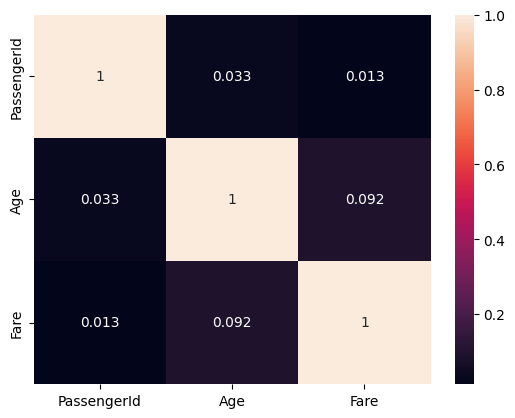

In [13]:
sns.heatmap(d[continous].corr(),annot=True)
plt.show()

In [14]:
X=d.drop('Survived',axis=1)
y=d['Survived']

In [15]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [16]:
Train=[]
CV=[]
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(X_train,y_train)
    ypred_train=model.predict(X_train)
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())

em=pd.DataFrame({'Train':Train,'CV':CV})
gm=em[(abs(em['Train']-em['CV'])<=0.05)]
rs=gm[gm['CV']==gm['CV'].max()].index.tolist()[0]
print('best random state number:',rs)

best random state number: 8


1.LogisticRegression
-

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression(random_state=8)
log_reg.fit(X_train,y_train)
ypred_train=log_reg.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross Validation Score:',cross_val_score(log_reg,X,y).mean())

Train Accuracy: 0.8188202247191011
Cross Validation Score: 0.7957253154227606


2.KNN
-

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
ypred_train=model.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(model,X,y).mean())

Train Accuracy: 0.7471910112359551
CV Score: 0.5408762789529848


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model_knn=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}
grid=GridSearchCV(model_knn,param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 27}

In [21]:
from sklearn.model_selection import cross_val_score
model_knn=KNeighborsClassifier(n_neighbors=27)
model_knn.fit(X_train,y_train)
ypred_train=model_knn.predict(X_train)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))

print('Cross Validation Score:',cross_val_score(model_knn,X,y).mean())

Train Accuracy: 0.6867977528089888
Cross Validation Score: 0.6037976272675916


3.SVM
-

In [22]:
from sklearn.svm import SVC
model_svc=SVC(random_state=8)
model_svc.fit(X_train,y_train)
ypred_train=model_svc.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(model_svc,X,y).mean())

Train Accuracy: 0.6558988764044944
CV Score: 0.6397589605172305


In [23]:
from sklearn.model_selection import GridSearchCV
model_svm=SVC(random_state=8)
param_grid={'C':[0.01,0.02,0.1,10],'kernel':['linear','rbf','sigmoid','poly']}
grid_svm=GridSearchCV(model_svm,param_grid)
grid_svm.fit(X_train,y_train)
grid_svm.best_params_

{'C': 10, 'kernel': 'linear'}

In [24]:
model=SVC(kernel='linear',C=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
model.fit(X_train,y_train)
ypred_train=model.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(model,X,y).mean())

Train Accuracy: 0.8117977528089888
CV Score: 0.7957567007720796


4.DecisionTree
-

In [25]:
d.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=8)
dt_default.fit(X_train,y_train)
ypred_train=dt_default.predict(X_train)
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(dt_default,X,y).mean())

Train Accuracy: 1.0
CV Score: 0.754403364509447


In [27]:
DT=DecisionTreeClassifier(random_state=8)
param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,10))}
grid_dt=GridSearchCV(DT,param_grid)
grid_dt.fit(X_train,y_train)
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [28]:
feats_dt=pd.DataFrame(data=grid_dt.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
important_feature_list_dt=feats_dt[feats_dt['Importance']>0].index.tolist()
important_feature_list_dt

['Pclass', 'Sex', 'Age', 'Fare']

In [29]:
X_imp=X[important_feature_list_dt]
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_imp,y,test_size=0.2,random_state=8)
final_dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=8)
final_dt.fit(X_train_dt,y_train_dt)
ypred_train_dt=final_dt.predict(X_train_dt)

print('Train Accuracy:',accuracy_score(ypred_train_dt,y_train_dt))

print('Cross Validation Score:',cross_val_score(final_dt,X_imp,y).mean())

Train Accuracy: 0.8328651685393258
Cross Validation Score: 0.815931203314293


5.RandomForestClassifier
-

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=8)
model_rf.fit(X_train,y_train)
ypred_train=model_rf.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(model_rf,X,y).mean())

Train Accuracy: 1.0
CV Score: 0.8070679806666249


In [31]:
estimator_rf=RandomForestClassifier(random_state=8)
param_grid={'n_estimators':list(range(1,50))}
grid_rf=GridSearchCV(estimator_rf,param_grid)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'n_estimators': 45}

In [32]:
feats_rf=pd.DataFrame(data=grid_rf.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
important_feature_list_rf=feats_rf[feats_rf['Importance']>0].index.tolist()
important_feature_list_rf

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [33]:
X_imp_rf=X[important_feature_list_rf]
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X_imp_rf,y,test_size=0.2,random_state=8)
final_rf=RandomForestClassifier(n_estimators=45,random_state=8)
final_rf.fit(X_train_rf,y_train_rf)
ypred_train_rf=final_rf.predict(X_train_rf)

print('Train Accuracy:',accuracy_score(ypred_train_rf,y_train_rf))

print('Cross Validation Score:',cross_val_score(final_rf,X_imp_rf,y).mean())

Train Accuracy: 0.9971910112359551
Cross Validation Score: 0.792524009792229


6.Boosting
-

In [34]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier(random_state=8)
Ada.fit(X_train,y_train)
ypred_train=Ada.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(Ada,X,y).mean())

Train Accuracy: 0.824438202247191
CV Score: 0.7678049086686334


In [35]:
from sklearn.ensemble import AdaBoostClassifier
estimator_Ada=AdaBoostClassifier(random_state=8)
param_grid={'n_estimators':list(range(1,50))}
grid_Ada=GridSearchCV(estimator_Ada,param_grid)
grid_Ada.fit(X_train,y_train)
grid_Ada.best_params_

{'n_estimators': 11}

In [36]:
feats_Ada=pd.DataFrame(data=grid_Ada.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
imp_features_list_Ada=feats_Ada[feats_Ada['Importance']>0].index.tolist()
imp_features_list_Ada

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

In [37]:
X_imp_Ada=X[imp_features_list_Ada]
Ada_boost=AdaBoostClassifier(n_estimators=11)
Ada_boost.fit(X_train,y_train)
ypred_train_Ada=Ada_boost.predict(X_train)

print('Train Accuracy:',accuracy_score(ypred_train_Ada,y_train))

print('Cross Validation score:',cross_val_score(Ada_boost,X_imp_Ada,y).mean())

Train Accuracy: 0.8188202247191011
Cross Validation score: 0.8024543343167411


7.GradientBoosting
-

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=8)
estimator.fit(X_train,y_train)
ypred_train=estimator.predict(X_train)
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(estimator,X,y).mean())

Train Accuracy: 0.9283707865168539
CV Score: 0.7802083987194777


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=8)
param_grid={'n_estimators':list(range(1,30)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid_db=GridSearchCV(estimator,param_grid)
grid_db.fit(X_train,y_train)
grid_db.best_params_

{'learning_rate': 0.3, 'n_estimators': 8}

In [40]:
feats_gb=pd.DataFrame(data=grid_db.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
imp_feature_gb=feats_gb[feats_gb['Importance']>0].index.tolist()
imp_feature_gb

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [41]:
X_imp_gb=X[imp_feature_gb]
X_train_gb,X_test_gb,y_train_gb,y_test_gb=train_test_split(X_imp_gb,y,test_size=0.2,random_state=8)
estimator_gb=GradientBoostingClassifier(learning_rate=0.3,n_estimators=8)
estimator_gb.fit(X_train_gb,y_train_gb)
ypred_train_gb=estimator_gb.predict(X_train_gb)

print('Train Accuracy:',accuracy_score(ypred_train_gb,y_train_gb))

print('Cross Validation Score:',cross_val_score(estimator_gb,X_imp_gb,y).mean())

Train Accuracy: 0.8497191011235955
Cross Validation Score: 0.7869123093340028


8.XGBoost
-

In [42]:
from xgboost import XGBClassifier
estimator_xg=XGBClassifier(random_state=8)
estimator_xg.fit(X_train,y_train)
ypred_train=estimator_xg.predict(X_train)
print('Trai Accuracy:',accuracy_score(ypred_train,y_train))
print('CV Score:',cross_val_score(estimator_xg,X,y).mean())

Trai Accuracy: 0.9985955056179775
CV Score: 0.786880923984684


In [43]:
from xgboost import XGBClassifier
estimator_xgb=XGBClassifier(random_state=8)
param_grid={'n_estimators':[10,20,30,40,50],'max_depth':[1,2,3,4,5,6],'gamma':[0,0.15,0.25,0.5,0.6,1]}
grid_xgb=GridSearchCV(estimator_xgb,param_grid)
grid_xgb.fit(X_train,y_train)
grid_xgb.best_params_

{'gamma': 0.25, 'max_depth': 3, 'n_estimators': 20}

In [44]:
feats_xgb=pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
imp_feature_xgb=feats_xgb[feats_xgb['Importance']>0].index.tolist()
imp_feature_xgb

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [45]:
X_imp_xgb=X[imp_feature_xgb]
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb=train_test_split(X_imp_xgb,y,test_size=0.2,random_state=8)
estimator_xgb=XGBClassifier(n_estimators=20,max_depth=3,gamma=0.25)
estimator_xgb.fit(X_train_xgb,y_train_xgb)
ypred_train_xgb=estimator_xgb.predict(X_train_xgb)

print('Train Accuracy:',accuracy_score(ypred_train_xgb,y_train_xgb))

print('Cross Validation Score:',cross_val_score(estimator_xgb,X_imp_xgb,y).mean())

Train Accuracy: 0.8848314606741573
Cross Validation Score: 0.7802083987194778


In [46]:
Ada=AdaBoostClassifier(n_estimators=11)

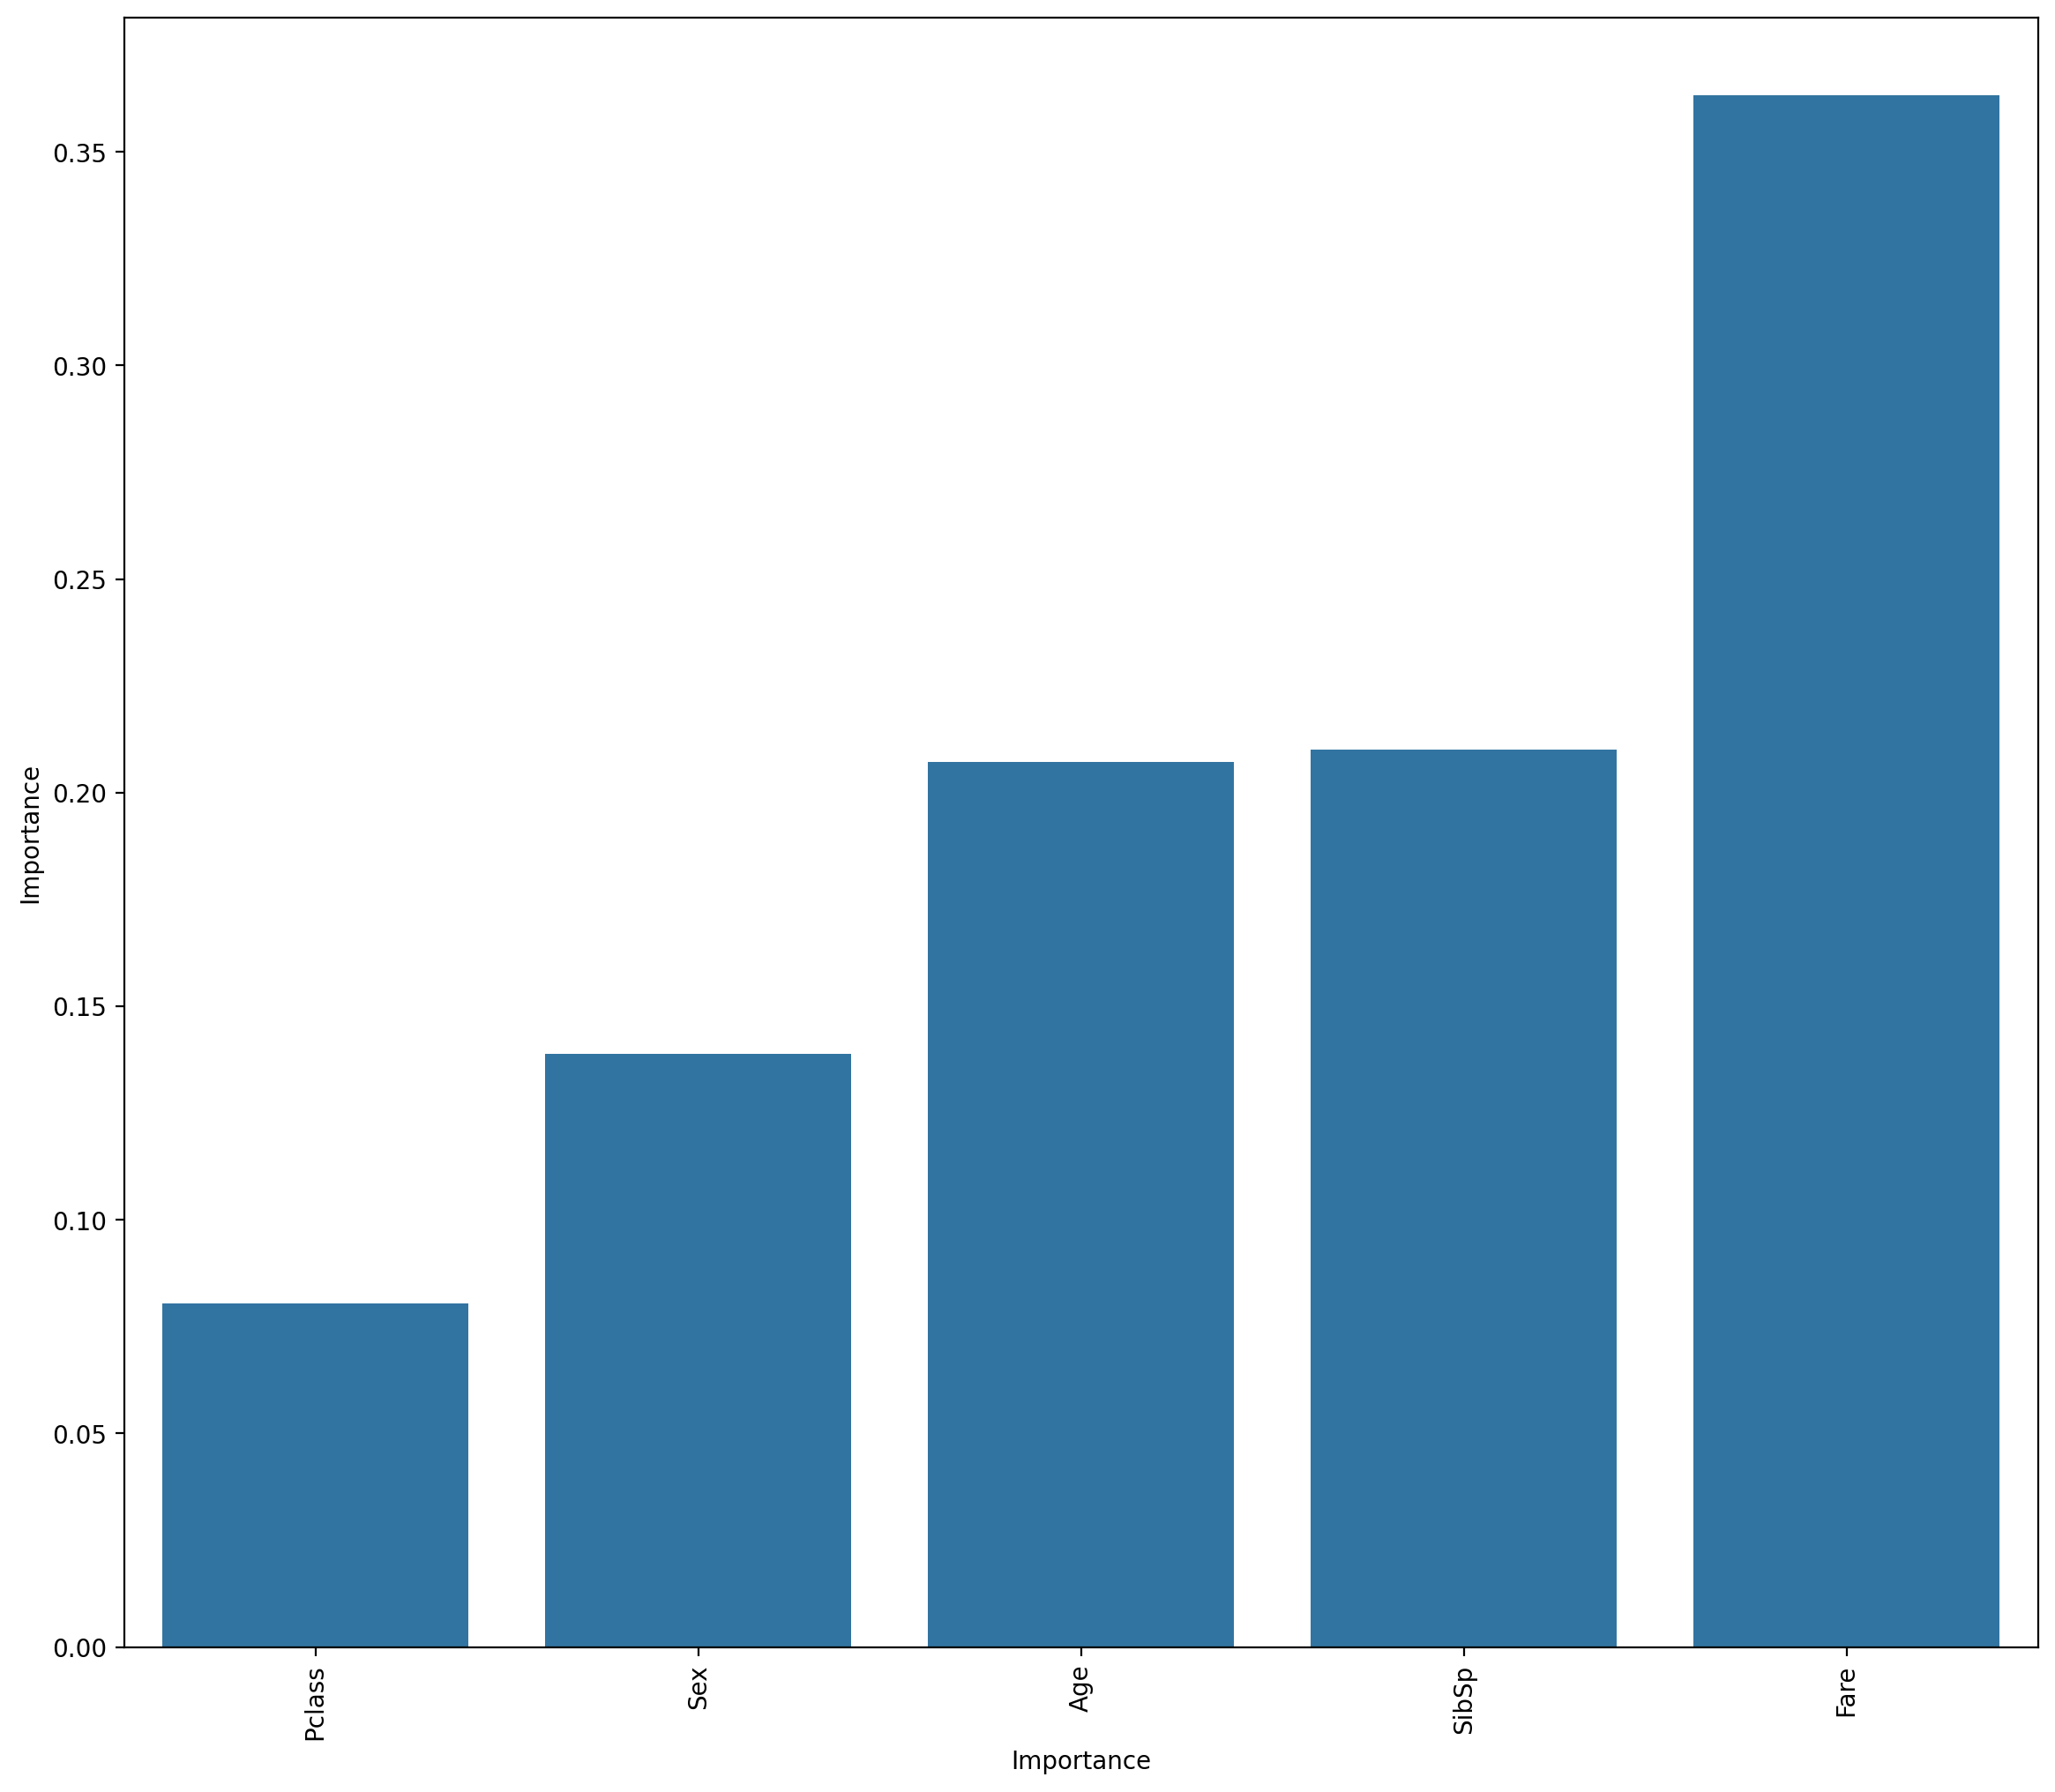

In [47]:
plt.figure(figsize=(14,12),dpi=200)
sns.barplot(data=feats_Ada[feats_Ada['Importance']>0].sort_values('Importance'),x=feats_Ada[feats_Ada['Importance']>0].index,y='Importance')
plt.xticks(rotation=90)
plt.xlabel('Importance')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,ypred_train_Ada)

array([[394,  47],
       [ 82, 189]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train,ypred_train_Ada))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       441
           1       0.80      0.70      0.75       271

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



In [50]:
#DT boosting classifier

In [51]:
from joblib import dump
dump(final_dt,'Titanic.joblib')

['Titanic.joblib']